In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join

df = pd.read_csv('data/HotelReservations.csv')

# Convertir tipos de datos a string

df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['previous_cancellations'] = df['previous_cancellations'].astype('str')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('str')

# Creando la columna arrival_date y cambiando su tipo de datos a fecha y hora

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors = 'coerce')

# Combinar niños y bebés juntos como niños

df['kids'] = df['children'] + df['babies']

# Creando la columna total_members

df['total_members'] = df['kids'] + df['adults']

# Total de noches por reserva

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Cambio de la columna arrival_date_month para mostrar el número de mes en lugar del nombre del mes

import datetime as dt

df['arrival_date_month'] = df['arrival_date'].dt.month

# Crear una columna family

df['family'] = np.where(df['kids'] > 0, '1', '0')

# Conjunto de datos sólo con reservas confirmadas

confirmed_bookings = df[df['is_canceled'] == '0']

# Conjunto de datos sólo con reservas canceladas

canceled_bookings = df[df['is_canceled'] == '1']

## Reservas de Hotel
Este conjunto de datos de reservas de hotel contiene informacion sobre los precios promedios de las habitaciones y de las reservas; el numero de reservas anteriores canceladas por el cliente; fechas de ingreso y salida; el tipo de habitacion; plaza de aparcamiento; plan de comidas, etc. Las razones tipicas de las cancelaciones incluyen varios factores, a veces se facilita con la opcion de hacerlo gratis o a un bajo costo, que es beneficioso para el cliente pero no asi para los hoteles. ¿Se podrá predecir si el cliente cumplirá o cancelará la reserva? 

## Variables

hotel : Hotel (H1 = Resort Hotel o H2 = City Hotel)

is_canceled :Valor que indica si la reserva se ha cancelado (1) o no (0)

lead_time : Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada

arrival_date_year : Año de la fecha de llegada

arrival_date_month : Mes de la fecha de llegada

arrival_date_week_number : Número de semana del año para la fecha de llegada

arrival_date_day_of_month : Día de llegada

stays_in_weekend_nights : Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel

stays_in_week_nights : Número de noches de la semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel

adults : Número de adultos

children : Número de niños

babies : Número de bebés

meal: Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Sin definir/SC: sin paquete de comidas; BB: alojamiento y desayuno; HB: media pensión (desayuno y otra comida, normalmente cena); FB: pensión completa (desayuno, almuerzo y cena).

country : País de origen. Las categorías se representan en el formato ISO 3155-3:2013

market_segment : Designación del segmento de mercado. En las categorías, el término "AT" significa "agencias de viajes" y "TO" significa "turoperadores".

distribution_channel : Canal de distribución de reservas. El término "AT" significa "Agencias de Viajes" y "TO" significa "Tour Operadores".

is_repeated_guest :Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)

previous_cancellations : Número de reservas anteriores canceladas por el cliente antes de la reserva actual

previous_bookings_not_canceled : Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

reserved_room_type : Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.

booking_changes : Número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento de la facturación o la cancelación.

required_car_parking_spaces : Número de plazas de aparcamiento que necesita el cliente

reservation_status : Último estado de la reserva, asumiendo una de las tres categorías: Cancelada: el cliente ha cancelado la reserva; Check-Out: el cliente se ha registrado pero ya se ha marchado; No-Show: el cliente no se ha registrado y ha informado al hotel del motivo. 

reservation_status_date : Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se canceló la reserva o cuándo abandonó el cliente el hotel.


## Fuente: Kaggle.com

https://www.kaggle.com/code/marta99/hotel-booking-demand-eda-visualization/data

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,total_members,total_nights,family
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,1,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,1,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2015-07-01,0.0,2.0,2,0


In [3]:
df.describe()


,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids,total_members,total_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119386.000000,119390.000000
mean,104.011416,6.552483,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,0.111839,1.968229,3.427900
std,106.863097,3.090619,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.412567,0.722400,2.557439
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,69.000000,7.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,160.000000,9.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,0.000000,2.000000,4.000000
max,737.000000,12.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,10.000000,55.000000,69.000000


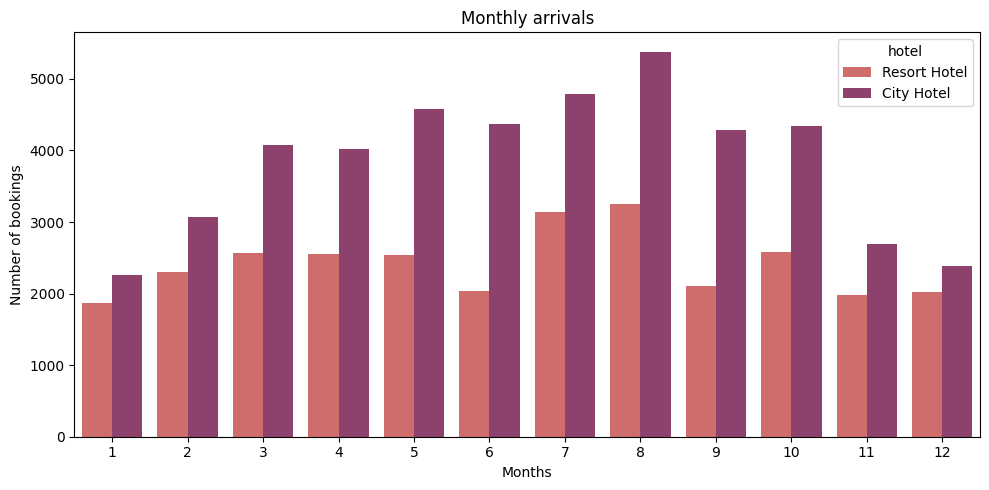

In [4]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'arrival_date_month', data = confirmed_bookings, hue = 'hotel', palette = 'flare')
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()

# Mes con más llegada de huéspedes
## Agosto y julio son los meses con mayor número de llegadas para ambos hoteles.

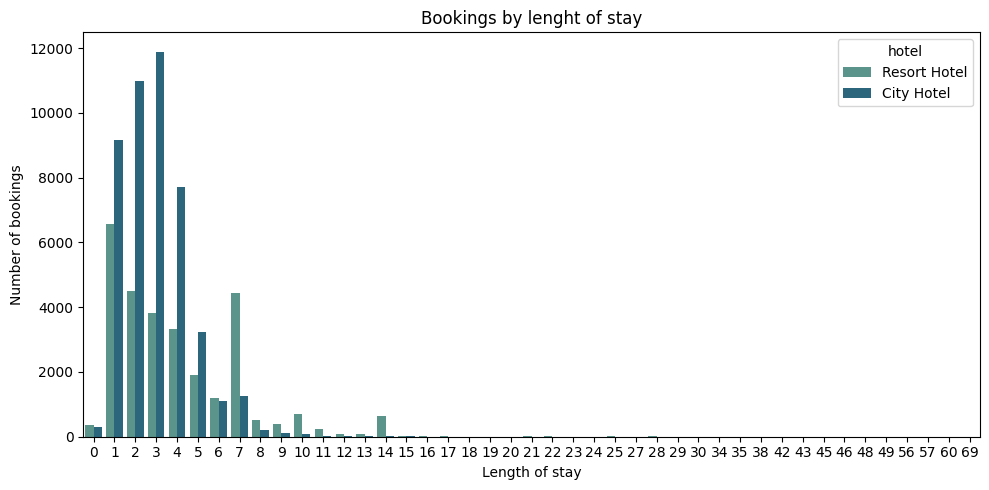

In [5]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'total_nights', data = confirmed_bookings, hue = 'hotel', palette = 'crest')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

# ¿Cuánto tiempo tienden a permanecer las huéspedes en el hotel?
## Los huéspedes prefieren pasar entre 1 y 4 días en el hotel, aunque en el caso del resort hay más estancias de mayor duración.

C:\Users\Usuario-pc\AppData\Local\Temp\ipykernel_24932\274453794.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)


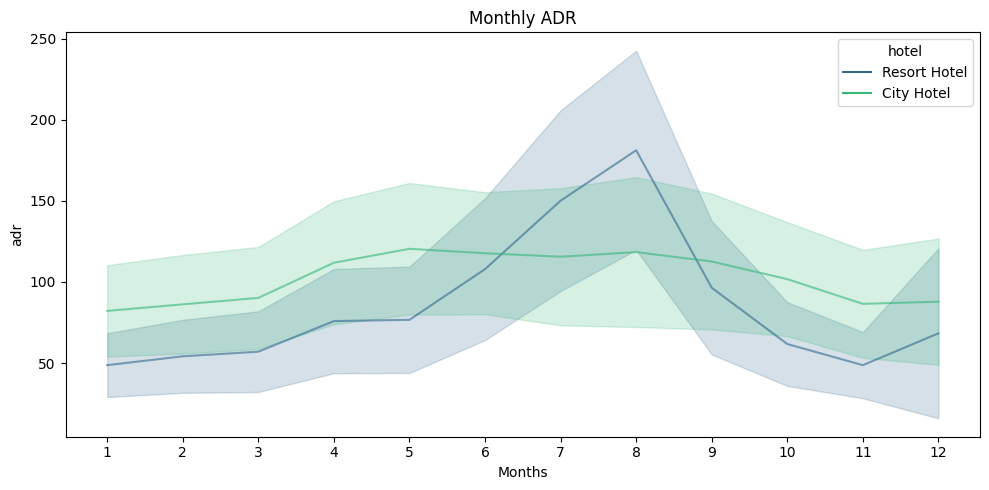

In [6]:
plt.figure(figsize = (10, 5))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

# ¿Cuál es la Tarifa Media Diaria (ADR) durante todo el año?
## Hay un pico en el mes de agosto, lo cual es lógico ya que es el mes con mayor número de llegadas.

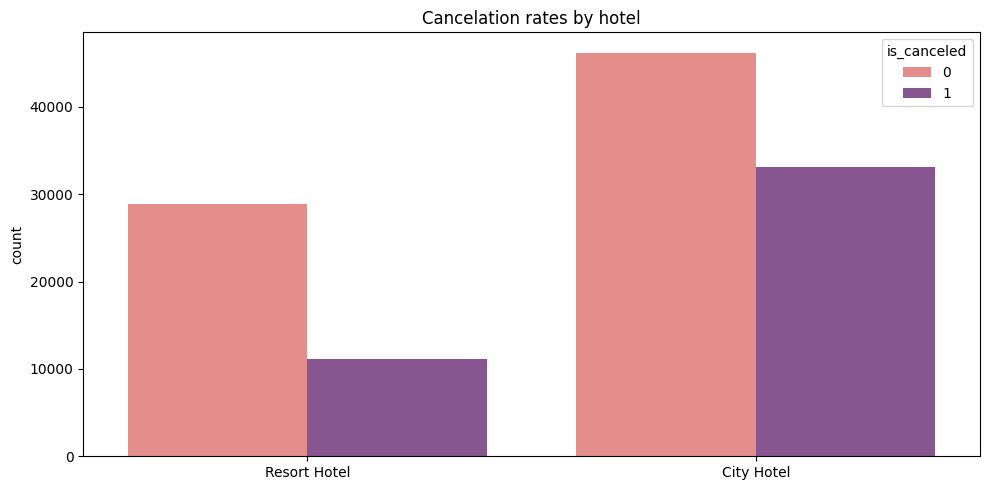

In [7]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')

plt.tight_layout()

# ¿Cuántas reservas se cancelaron del total?
## Hay altas tasas de cancelaciones en ambos hoteles.

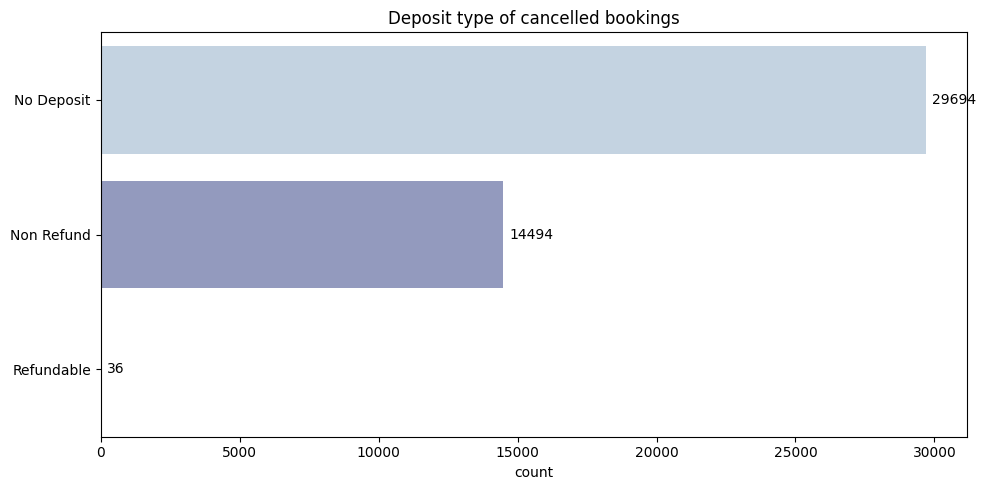

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, y = 'deposit_type', data = canceled_bookings, orient = "h" ,palette = 'BuPu').set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Deposit type of cancelled bookings')

plt.tight_layout()

# ¿Cuál es el tipo de depósito más frecuente para reservas canceladas?
## La mayoría de las reservas canceladas no requerían depósito.

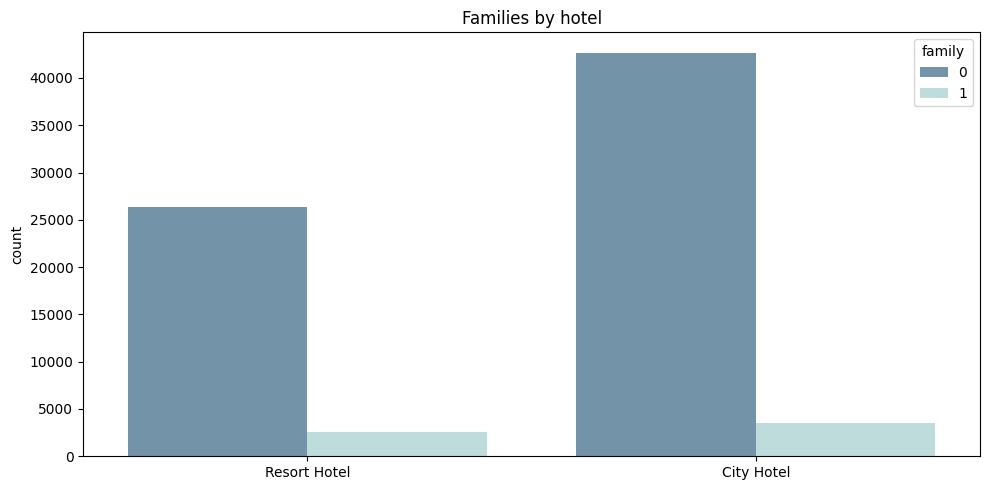

In [9]:
plt.figure(figsize = (10, 5))

palette = ["#457b9d", "#a8dadc"]

sns.countplot(data = confirmed_bookings, x = 'hotel', hue = 'family', palette = palette, alpha = 0.8).set(xlabel = None)
plt.title('Families by hotel')

plt.tight_layout()

# ¿Qué hotel es el preferido por los adultos con niños?
## No hay muchas familias en ninguno de los hoteles, pero hay cierta predisposición por el hotel de ciudad.